# Image processing with tensorflow

This notebook will show how the images in a dataset can be processed using both geometric and colour operations.

It will also present a new way of loading data.

### Refs

TensorFlow addons: https://www.tensorflow.org/addons

command: pip install tensorflow-addons

Loading custom datasets: https://www.tensorflow.org/tutorials/load_data/images

In [1]:
import tensorflow as tf

# this package will be used for the data augmentation operations
import tensorflow_addons as tfa

import numpy as np

import os
import pathlib
import matplotlib.pyplot as plt

2023-04-28 10:16:31.162549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 10:16:31.260396: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 10:16:31.262932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-04-28 10:16:31.262941: I tensorflow/compiler/xla/stream

### Settings

In [2]:
data_dir = 'dogsVScats'

IMG_SIZE = 128

### Aux function to show images

In [3]:
def show_images(image_batch, label_batch, rows, columns):
  count = rows* columns  
  plt.figure(figsize=(10, 2 * rows))
  for n in range(count):
      ax = plt.subplot(int(rows), columns, n+1)
      plt.imshow((image_batch[n]))
      plt.title(classNames[label_batch[n]==1][0])
      plt.axis('off')

In [4]:
BATCH_SIZE = 8

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

normalize = tf.keras.layers.Rescaling(1.0/255)
dataset = dataset.map(lambda x,y: (normalize(x),y))

classNames = np.array(os.listdir(data_dir))

Found 16 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-04-28 10:16:32.585093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-28 10:16:32.585610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-04-28 10:16:32.585718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-04-28 10:16:32.585801: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared

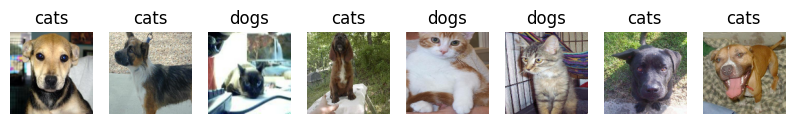

In [5]:
image_batch, label_batch = next(iter(dataset))
show_images(image_batch, label_batch, 1, 8)

In [6]:
def process_image (image, label):
    
    r = tf.random.uniform(shape=(), minval=0, maxval=0.5) - 0.25
    image = tfa.image.rotate(image, r)
    
    rx = tf.random.uniform(shape=(), minval=0, maxval=20) - 10
    ry = tf.random.uniform(shape=(), minval=0, maxval=20) - 10
    image = tfa.image.translate(image, [rx, ry])
    image = tfa.image.random_hsv_in_yiq(image, 
                                        0.4,
                                       0.4, 1.4,
                                       0.4, 1.4)
    image = tf.clip_by_value(image, 0.0, 1.0)
    
    return image, label

In [7]:
datasetA = dataset.map(process_image)

/home/lau/.local/lib/python3.10/site-packages/tensorflow_addons/utils/resource_loader.py:78: UserWarning: You are currently using TensorFlow 2.11.0 and trying to load a custom op (custom_ops/image/_distort_image_ops.so).
TensorFlow Addons has compiled its custom ops against TensorFlow 2.12.0, and there are no compatibility guarantees between the two versions. 
This means that you might get segfaults when loading the custom op, or other kind of low-level errors.
 If you do, do not file an issue on Github. This is a known limitation.

It might help you to fallback to pure Python ops by setting environment variable `TF_ADDONS_PY_OPS=1` or using `tfa.options.disable_custom_kernel()` in your code. To do that, see https://github.com/tensorflow/addons#gpucpu-custom-ops 

You can also change the TensorFlow version installed on your system. You would need a TensorFlow version equal to or above 2.12.0 and strictly below 2.13.0.
 Note that nightly versions of TensorFlow, as well as non-pip Tensor

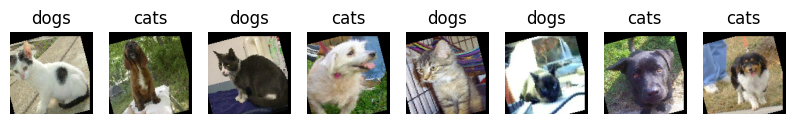

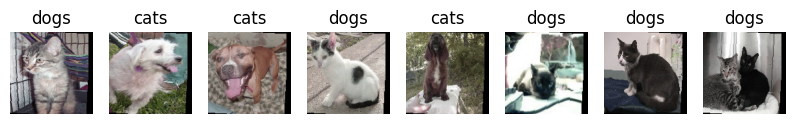

In [8]:
image_batch, label_batch = next(iter(datasetA))
show_images(image_batch, label_batch, 1, 8)
image_batch, label_batch = next(iter(datasetA))
show_images(image_batch, label_batch, 1, 8)

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=None,
    label_mode='categorical',
    shuffle=True
)

normalize = tf.keras.layers.Rescaling(1.0/255)

datasetB = dataset.map(lambda x,y: (normalize(x),y))

datasetB = datasetB.map(process_image)
datasetB = datasetB.batch(batch_size=BATCH_SIZE)

Found 16 files belonging to 2 classes.


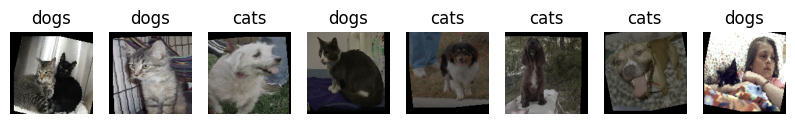

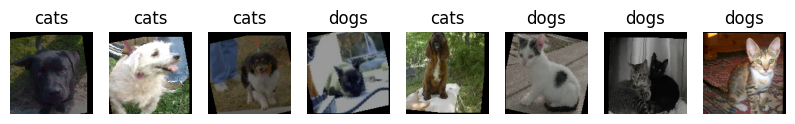

In [10]:
image_batch, label_batch = next(iter(datasetB))
show_images(image_batch, label_batch, 1, 8)
image_batch, label_batch = next(iter(datasetB))
show_images(image_batch, label_batch, 1, 8)

In [11]:
def process_image_trans(image, label):
    rx = tf.random.uniform(shape=(), minval=0, maxval=20) - 10
    ry = tf.random.uniform(shape=(), minval=0, maxval=20) - 10
    image = tfa.image.translate(image, [rx, ry])
    
    return image, label

def process_image_rot(image, label):
    r = tf.random.uniform(shape=(), minval=0, maxval=0.5) - 0.25
    image = tfa.image.rotate(image, r)
    
    return image, label

In [18]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=None,
    label_mode='categorical',
    shuffle=False
)

normalize = tf.keras.layers.Rescaling(1.0/255)

dataset = dataset.map(lambda x,y: (normalize(x),y))

datasetC = dataset.map(process_image_rot)
datasetC = datasetC.concatenate(dataset.map(process_image_trans))

datasetC = datasetC.shuffle(32)
datasetC = datasetC.batch(batch_size=BATCH_SIZE)

Found 16 files belonging to 2 classes.


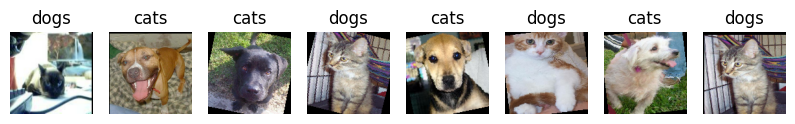

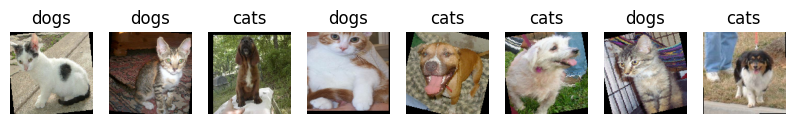

In [19]:
image_batch, label_batch = next(iter(datasetC))
show_images(image_batch, label_batch, 1, 8)
image_batch, label_batch = next(iter(datasetC))
show_images(image_batch, label_batch, 1, 8)